# Comparison of IMB performance with node locality

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})
import pandas as pd

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
baseline = 'sameswitch'
compare = ['diffswitch']
placements = ['sameswitch','diffswitch']

## Ping Pong

In [6]:
benchmark = 'PingPong'
imb_perf = []
nodelist = [2]
for placement in placements:
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{placement}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            tlist = imb.get_perf_dict(file, nodes, placement)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                        Perf                                 \
                                         min    median       max       mean   
System     Nodes Processes Size                                               
diffswitch 2     2         0            0.00      0.00      0.00      0.000   
                           1            0.34      0.34      0.34      0.340   
                           2            0.67      0.69      0.69      0.686   
                           4            1.38      1.38      1.38      1.380   
                           8            2.75      2.76      2.76      2.758   
                           16           5.47      5.48      5.49      5.482   
                           32          10.93     10.94     10.97     10.948   
                           64          21.60     21.65     21.77     21.678   
                           128         42.55     42.70     42.97     42.742   
                           256         70.27     71.

diffswitch performance ratio to sameswitch performance
            #nodes
      #bytes         2
           0     0.000
           1     0.642
           2     0.639
           4     0.639
           8     0.637
          16     0.642
          32     0.642
          64     0.649
         128     0.652
         256     0.716
         512     0.722
        1024     0.735
        2048     0.751
        4096     0.756
        8192     0.793
       16384     0.850
       32768     0.882
       65536     0.910
      131072     0.922
      262144     0.961
      524288     0.941
     1048576     0.958
     2097152     0.968
     4194304     0.986


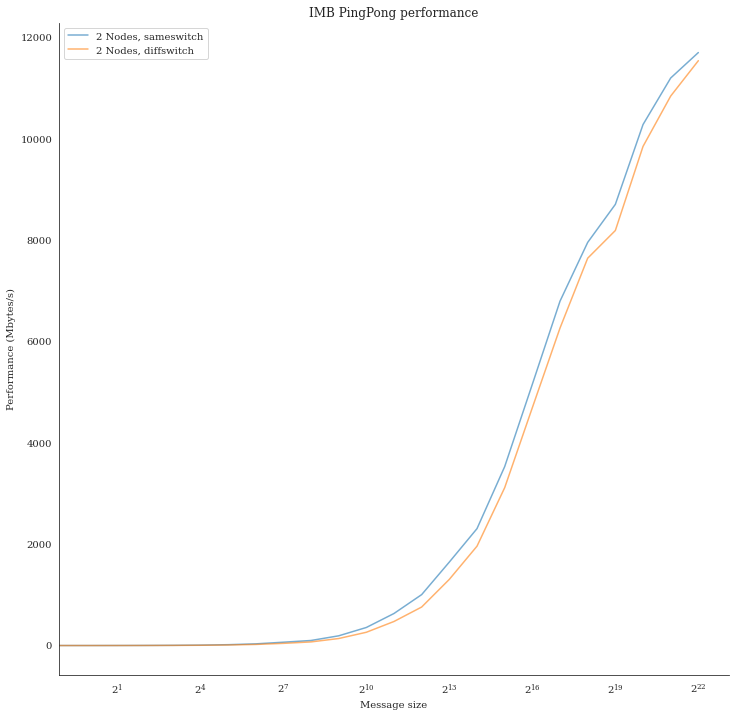

In [7]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, baseline, compare, 'max', invert=False)

# Plot performance
for placement in placements:
    sizes, perf = imb.get_size_scaling_df(imb_df, placement, 2, 'max')
    plt.plot(sizes, perf, label=f'{nodes} Nodes, {placement}', alpha=0.6)
    
sns.despine()
plt.xscale('log', base=2)
plt.xlabel("Message size")
plt.ylabel("Performance (Mbytes/s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Sendrecv

In [8]:
benchmark = 'Sendrecv'
imb_perf = []
nodelist = [4]
for placement in placements:
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{placement}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            tlist = imb.get_perf_dict(file, nodes, placement)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                        Perf                                 \
                                         min    median       max       mean   
System     Nodes Processes Size                                               
diffswitch 4     512       0            0.00      0.00      0.00      0.000   
                           1            1.42      1.95      2.10      1.884   
                           2            2.82      4.00      4.23      3.812   
                           4            3.39      8.10      8.48      6.916   
                           8            6.07     15.47     18.90     13.588   
                           16          32.87     34.77     38.62     35.230   
                           32          66.49     73.58     77.31     71.886   
                           64         137.66    147.29    160.88    147.042   
                           128        194.52    289.03    297.93    270.192   
                           256        489.29    568.

diffswitch performance ratio to sameswitch performance
            #nodes
      #bytes         4
           0     0.000
           1     0.959
           2     1.019
           4     0.883
           8     1.062
          16     1.069
          32     1.056
          64     1.071
         128     0.944
         256     1.009
         512     1.033
        1024     1.113
        2048     0.985
        4096     1.038
        8192     1.007
       16384     0.825
       32768     0.855
       65536     0.890
      131072     0.936
      262144     0.961
      524288     1.006
     1048576     0.992
     2097152     1.007
     4194304     1.004


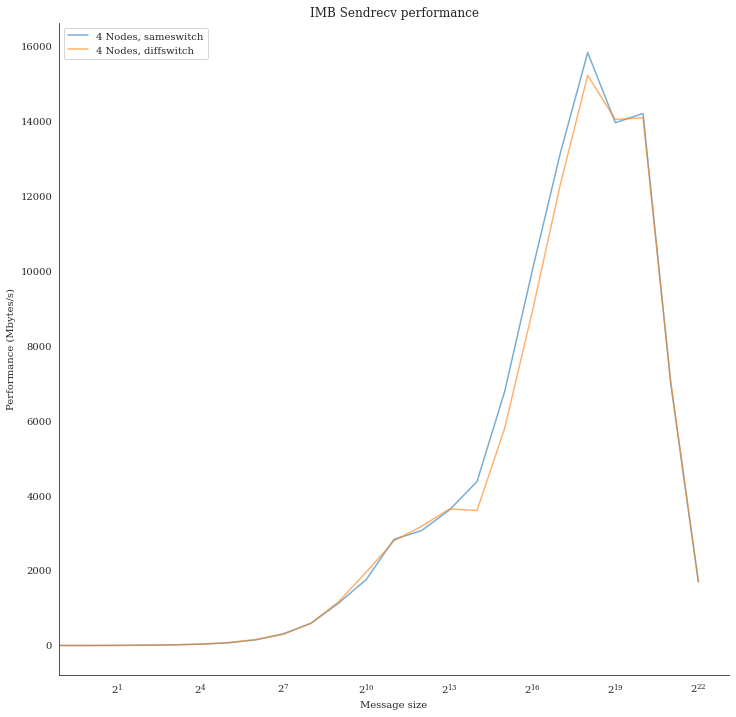

In [9]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, baseline, compare, 'max', invert=False)

# Plot performance
for placement in placements:
    sizes, perf = imb.get_size_scaling_df(imb_df, placement, 4, 'max')
    plt.plot(sizes, perf, label=f'{nodes} Nodes, {placement}', alpha=0.6)
    
sns.despine()
plt.xscale('log', base=2)
plt.xlabel("Message size")
plt.ylabel("Performance (Mbytes/s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Allgather

In [10]:
benchmark = 'Allgather'
imb_perf = []
nodelist = [4]
for placement in placements:
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{placement}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            tlist = imb.get_perf_dict(file, nodes, placement)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                         Perf                        \
                                          min     median        max   
System     Nodes Processes Size                                       
diffswitch 4     512       0             0.05       0.05       0.06   
                           1            21.06      21.12      24.15   
                           2            22.68      22.95      23.84   
                           4            25.08      25.13      27.83   
                           8            29.07      29.21      30.85   
                           16           38.48      38.50      41.75   
                           32           53.83      54.01      56.35   
                           64           75.33      75.79      76.20   
                           128         121.79     122.20     125.05   
                           256         204.32     205.05     206.17   
                           512         361.87     362.96     369.41   
      

diffswitch performance ratio to sameswitch performance
            #nodes
      #bytes         4
           0     1.000
           1     1.109
           2     1.095
           4     1.098
           8     1.108
          16     1.098
          32     1.080
          64     1.053
         128     1.030
         256     1.016
         512     1.015
        1024     1.014
        2048     0.978
        4096     0.996
        8192     1.004
       16384     1.001
       32768     1.000
       65536     1.001
      131072     1.001
      262144     1.003
      524288     1.005
     1048576     1.005


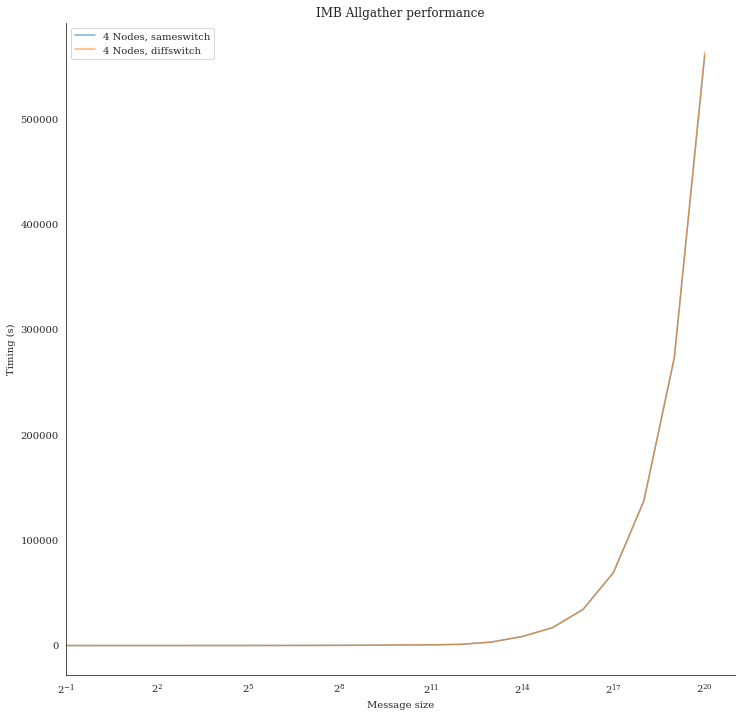

In [11]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, baseline, compare, 'min', invert=False)

# Plot performance
for placement in placements:
    sizes, perf = imb.get_size_scaling_df(imb_df, placement, 4, 'min')
    plt.plot(sizes, perf, label=f'{nodes} Nodes, {placement}', alpha=0.6)
    
sns.despine()
plt.xscale('log', base=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Allgatherv

In [12]:
benchmark = 'Allgatherv'
imb_perf = []
nodelist = [4]
for placement in placements:
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{placement}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            tlist = imb.get_perf_dict(file, nodes, placement)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                         Perf                        \
                                          min     median        max   
System     Nodes Processes Size                                       
diffswitch 4     512       0             0.88       0.88       0.88   
                           1            33.14      33.24      33.37   
                           2            34.42      34.68      35.37   
                           4            36.44      36.52      37.42   
                           8            39.79      40.42      42.90   
                           16           77.79      78.14      78.76   
                           32           92.85      93.14      95.05   
                           64          123.43     124.35     129.39   
                           128         167.97     168.50     171.03   
                           256         256.57     257.02     258.25   
                           512         401.54     403.22     412.41   
      

diffswitch performance ratio to sameswitch performance
            #nodes
      #bytes         4
           0     1.011
           1     1.084
           2     1.078
           4     1.075
           8     1.068
          16     1.037
          32     1.036
          64     1.036
         128     1.030
         256     1.027
         512     1.021
        1024     1.020
        2048     0.980
        4096     1.004
        8192     1.003
       16384     0.998
       32768     1.001
       65536     1.002
      131072     1.003
      262144     1.004
      524288     1.001
     1048576     1.005


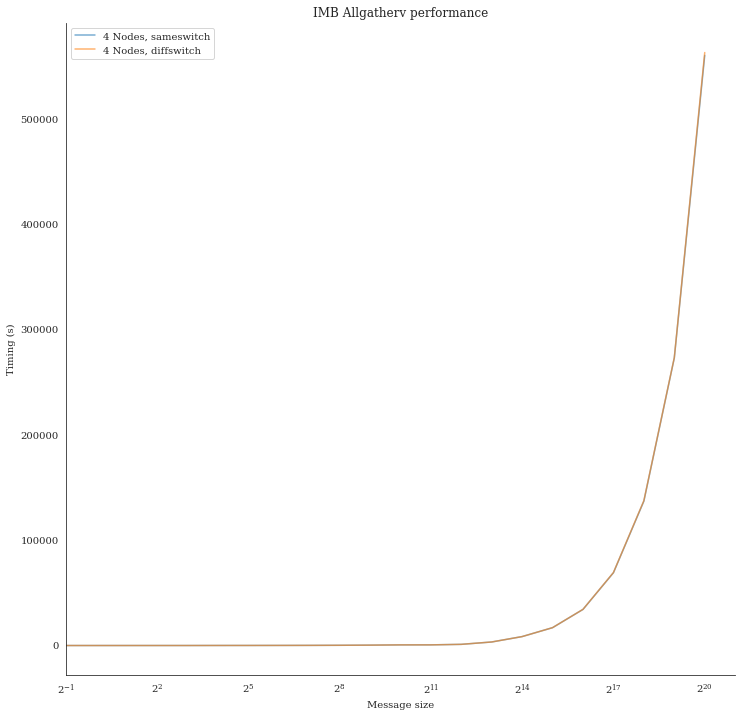

In [13]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, baseline, compare, 'min', invert=False)

# Plot performance
for placement in placements:
    sizes, perf = imb.get_size_scaling_df(imb_df, placement, 4, 'min')
    plt.plot(sizes, perf, label=f'{nodes} Nodes, {placement}', alpha=0.6)
    
sns.despine()
plt.xscale('log', base=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Allreduce

In [14]:
benchmark = 'Allreduce'
imb_perf = []
nodelist = [4]
for placement in placements:
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{placement}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            tlist = imb.get_perf_dict(file, nodes, placement)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                       Perf                                \
                                        min   median       max       mean   
System     Nodes Processes Size                                             
diffswitch 4     512       0           0.06     0.06      0.06      0.060   
                           4          10.54    10.64     10.71     10.630   
                           8          10.75    10.82     10.93     10.832   
                           16         10.76    10.84     11.17     10.888   
                           32         10.96    11.00     11.09     11.006   
                           64         11.83    12.33     12.67     12.266   
                           128        15.17    15.27     15.59     15.338   
                           256        17.61    17.69     17.81     17.698   
                           512        20.79    21.10     21.35     21.076   
                           1024       23.05    23.10     23.47     23.172   

diffswitch performance ratio to sameswitch performance
            #nodes
      #bytes         4
           0     1.000
           4     1.236
           8     1.236
          16     1.235
          32     1.234
          64     1.237
         128     1.161
         256     1.138
         512     1.076
        1024     1.093
        2048     1.085
        4096     1.096
        8192     1.087
       16384     1.068
       32768     1.054
       65536     1.037
      131072     1.024
      262144     1.017
      524288     1.004
     1048576     1.011
     2097152     1.008
     4194304     0.998


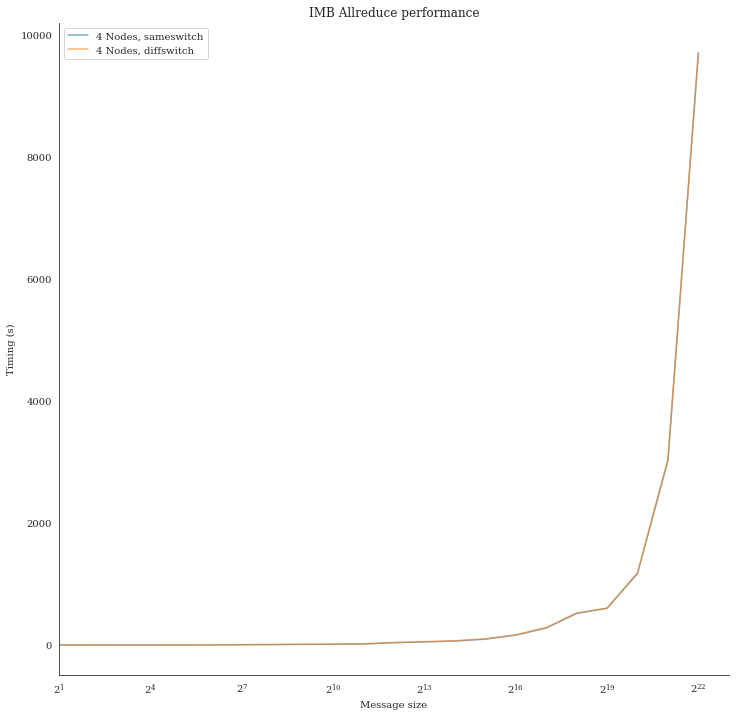

In [15]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, baseline, compare, 'min', invert=False)

# Plot performance
for placement in placements:
    sizes, perf = imb.get_size_scaling_df(imb_df, placement, 4, 'min')
    plt.plot(sizes, perf, label=f'{nodes} Nodes, {placement}', alpha=0.6)
    
sns.despine()
plt.xscale('log', base=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Alltoall

In [16]:
benchmark = 'Alltoall'
imb_perf = []
nodelist = [4]
for placement in placements:
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{placement}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            tlist = imb.get_perf_dict(file, nodes, placement)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                          Perf                          \
                                           min      median         max   
System     Nodes Processes Size                                          
diffswitch 4     512       0              0.05        0.05        0.05   
                           1            125.33      125.36      128.72   
                           2            126.11      126.98      128.19   
                           4            127.32      128.02      130.42   
                           8            136.03      136.72      136.95   
                           16           165.18      166.41      169.42   
                           32           239.57      241.23      241.58   
                           64           413.76      414.01      414.50   
                           128          812.30      814.88      815.70   
                           256         1691.04     1691.99     1694.36   
                           512        

diffswitch performance ratio to sameswitch performance
            #nodes
      #bytes         4
           0     1.000
           1     1.022
           2     1.018
           4     1.015
           8     1.015
          16     1.013
          32     1.008
          64     1.012
         128     1.024
         256     1.026
         512     1.011
        1024     0.998
        2048     1.010
        4096     1.005
        8192     1.011
       16384     1.012
       32768     1.015
       65536     1.015
      131072     1.018
      262144     1.015
      524288     1.010
     1048576     1.010


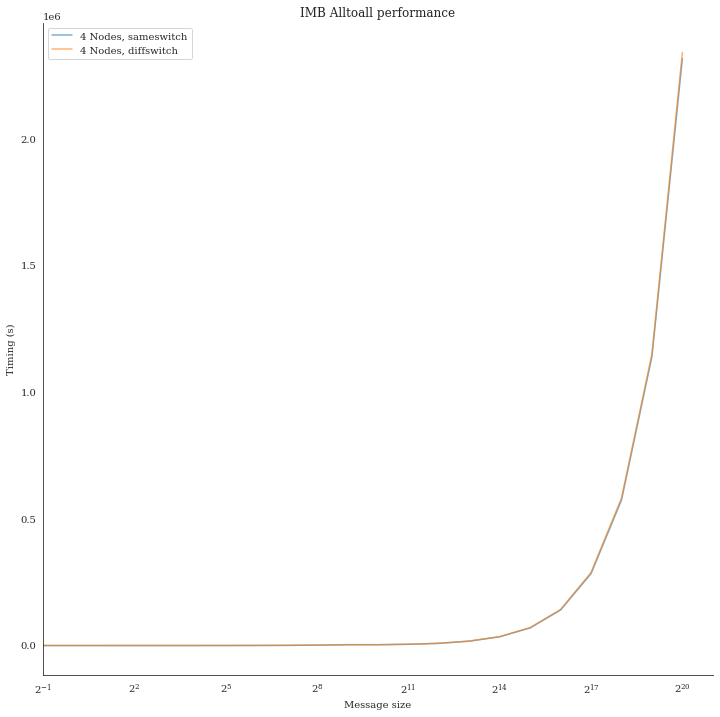

In [17]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, baseline, compare, 'min', invert=False)

# Plot performance
for placement in placements:
    sizes, perf = imb.get_size_scaling_df(imb_df, placement, 4, 'min')
    plt.plot(sizes, perf, label=f'{nodes} Nodes, {placement}', alpha=0.6)
    
sns.despine()
plt.xscale('log', base=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Alltoallv

In [18]:
benchmark = 'Alltoallv'
imb_perf = []
nodelist = [4]
for placement in placements:
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{placement}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            tlist = imb.get_perf_dict(file, nodes, placement)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                          Perf                          \
                                           min      median         max   
System     Nodes Processes Size                                          
diffswitch 4     512       0            101.23      101.46      101.51   
                           1           1379.99     1384.75     1421.56   
                           2           1385.35     1457.36     1544.56   
                           4           1386.95     1392.31     2090.57   
                           8           1385.86     1389.31     1457.87   
                           16          1386.70     1388.98     1505.73   
                           32          1396.27     1397.63     1518.60   
                           64          1477.02     1498.90     1696.13   
                           128         1417.91     1419.25     1432.41   
                           256         1603.38     1606.75     1674.68   
                           512        

diffswitch performance ratio to sameswitch performance
            #nodes
      #bytes         4
           0     1.001
           1     0.996
           2     0.997
           4     0.997
           8     0.997
          16     1.001
          32     1.001
          64     1.050
         128     1.000
         256     1.000
         512     1.001
        1024     1.001
        2048     1.010
        4096     1.019
        8192     1.012
       16384     1.013
       32768     1.015
       65536     1.013
      131072     1.010
      262144     1.002
      524288     1.009
     1048576     1.005


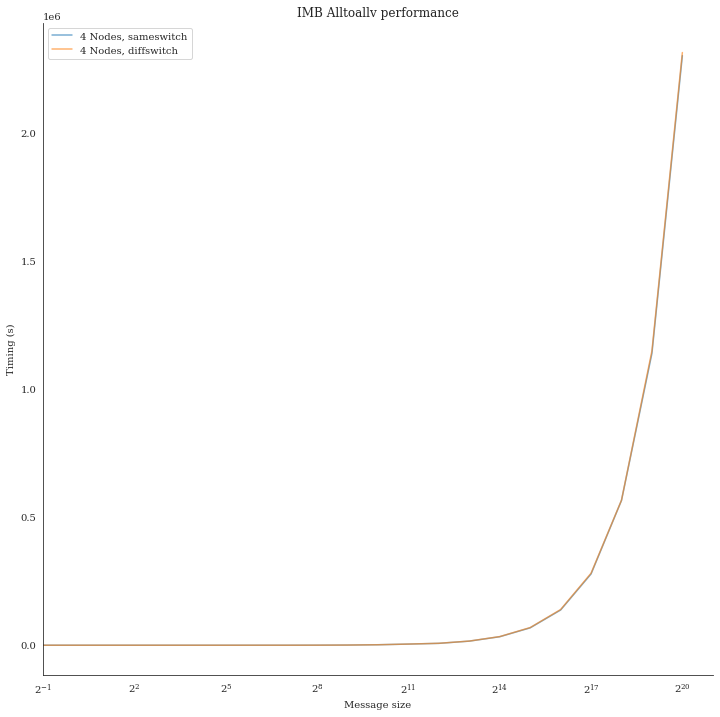

In [19]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, baseline, compare, 'min', invert=False)

# Plot performance
for placement in placements:
    sizes, perf = imb.get_size_scaling_df(imb_df, placement, 4, 'min')
    plt.plot(sizes, perf, label=f'{nodes} Nodes, {placement}', alpha=0.6)
    
sns.despine()
plt.xscale('log', base=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')